### Import and Read data

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('cases_with_source.csv', usecols = ['Date', 'No']).to_dict('split')['data']

### Define functions to process data

In [50]:
def get_graph_data(d):
    graph_data = {}
    for value in d:
        if value[1] in graph_data.keys():
            if graph_data.get(value[1]) < value[0]:
                graph_data[value[1]] = value[0]
        else:
            graph_data[value[1]] = value[0]
    
    return graph_data

def get_bar_data(d):
    bar_data = {}
    for value in d:
        if value[1] in bar_data.keys():
            bar_data[value[1]] = bar_data[value[1]] + 1
        else:
            bar_data[value[1]] = 1
    
    return bar_data

### Change data to series

In [51]:
graphData = get_graph_data(data)

barData = get_bar_data(data)
        
graphSeries = pd.Series(graphData).to_frame('Cases')

graphSeries.Cases = graphSeries.Cases.astype('int64')

barSeries = pd.Series(barData).to_frame('Cases')

barSeries.Cases = barSeries.Cases.astype('int64')

### Plot first figure

First graph shows the total cases in each date  

<Figure size 432x288 with 0 Axes>

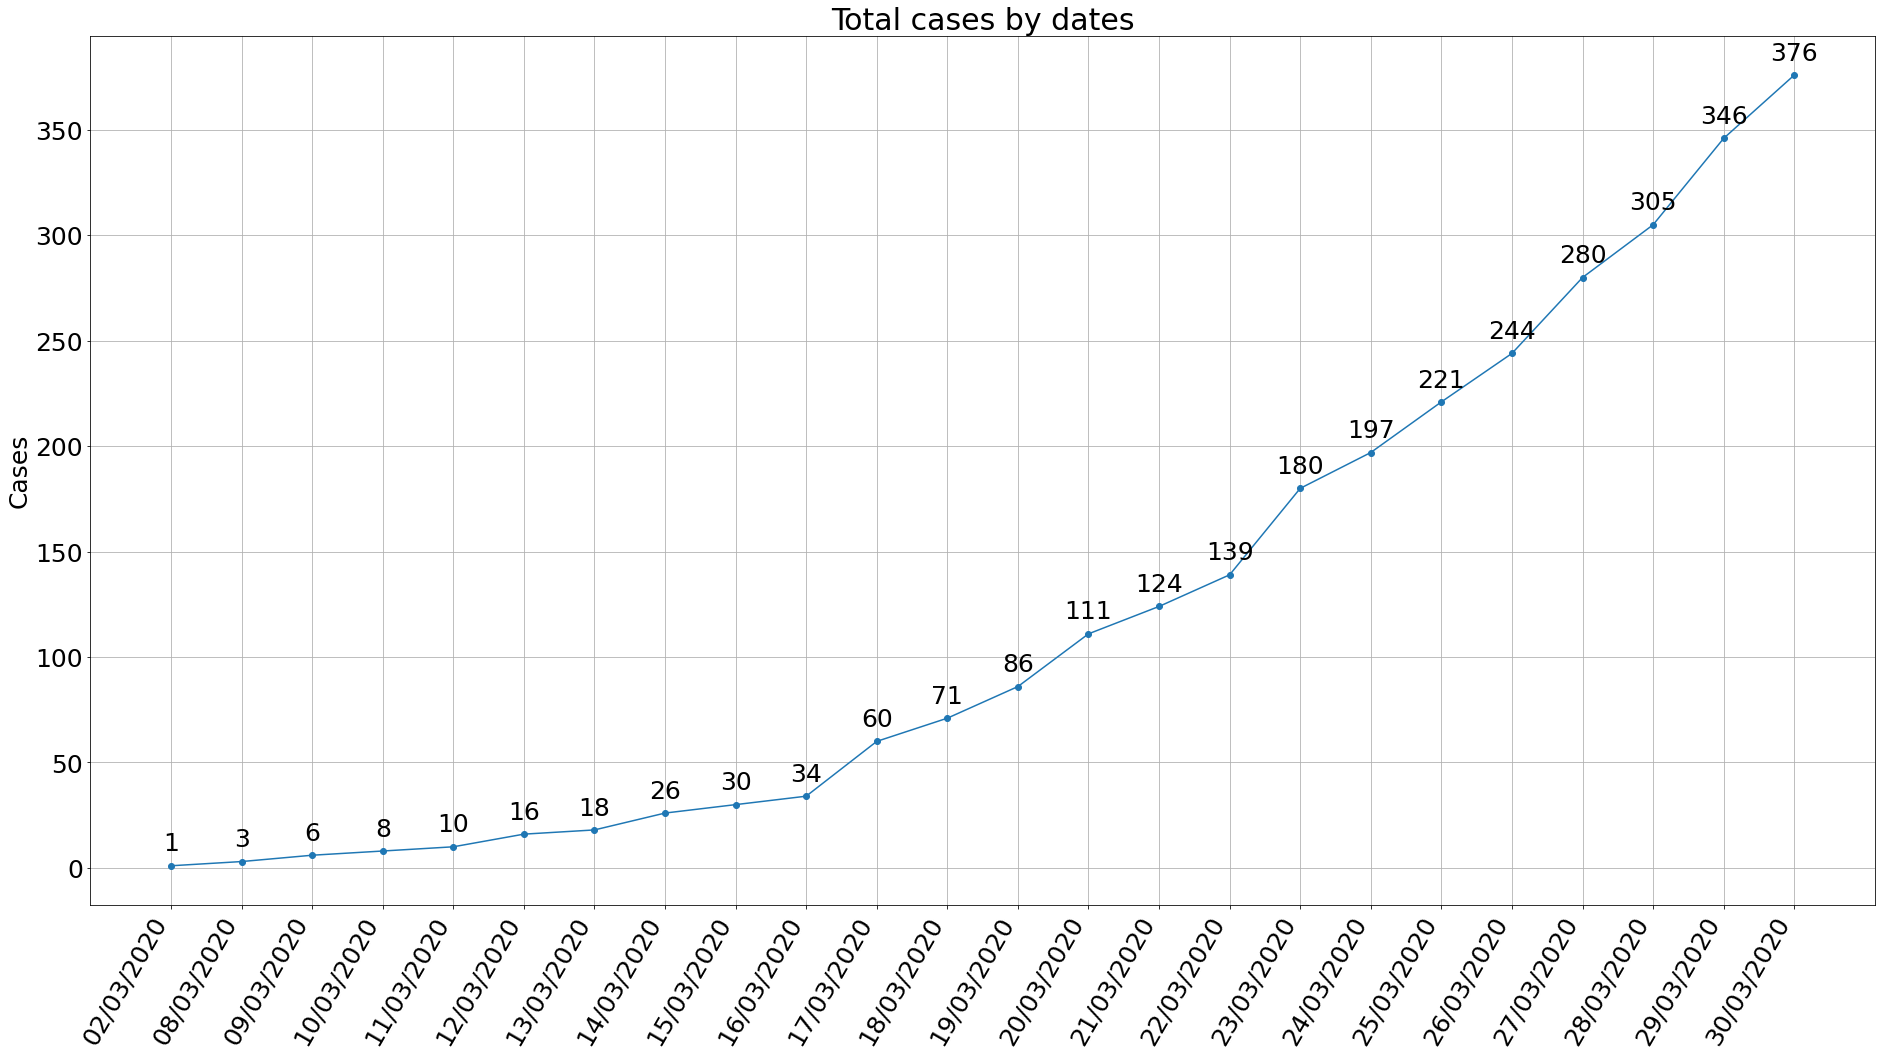

In [52]:
plt.figure(1)
plt.rcParams.update({'font.size': 25})

plt.figure(figsize=(32,16))

plt.plot(graphSeries.index, graphSeries['Cases'], marker='o')

for x,y in zip(graphSeries.index,graphSeries['Cases']):

    label = y

    plt.annotate(label, 
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,15),
                 ha='center')

plt.title('Total cases by dates')
plt.ylabel('Cases')
plt.xticks(rotation=60, ha="right")
plt.grid()
graph = plt.gcf()
plt.show()

### Plot second figure
Seconds graph shows the increase in each date

<Figure size 432x288 with 0 Axes>

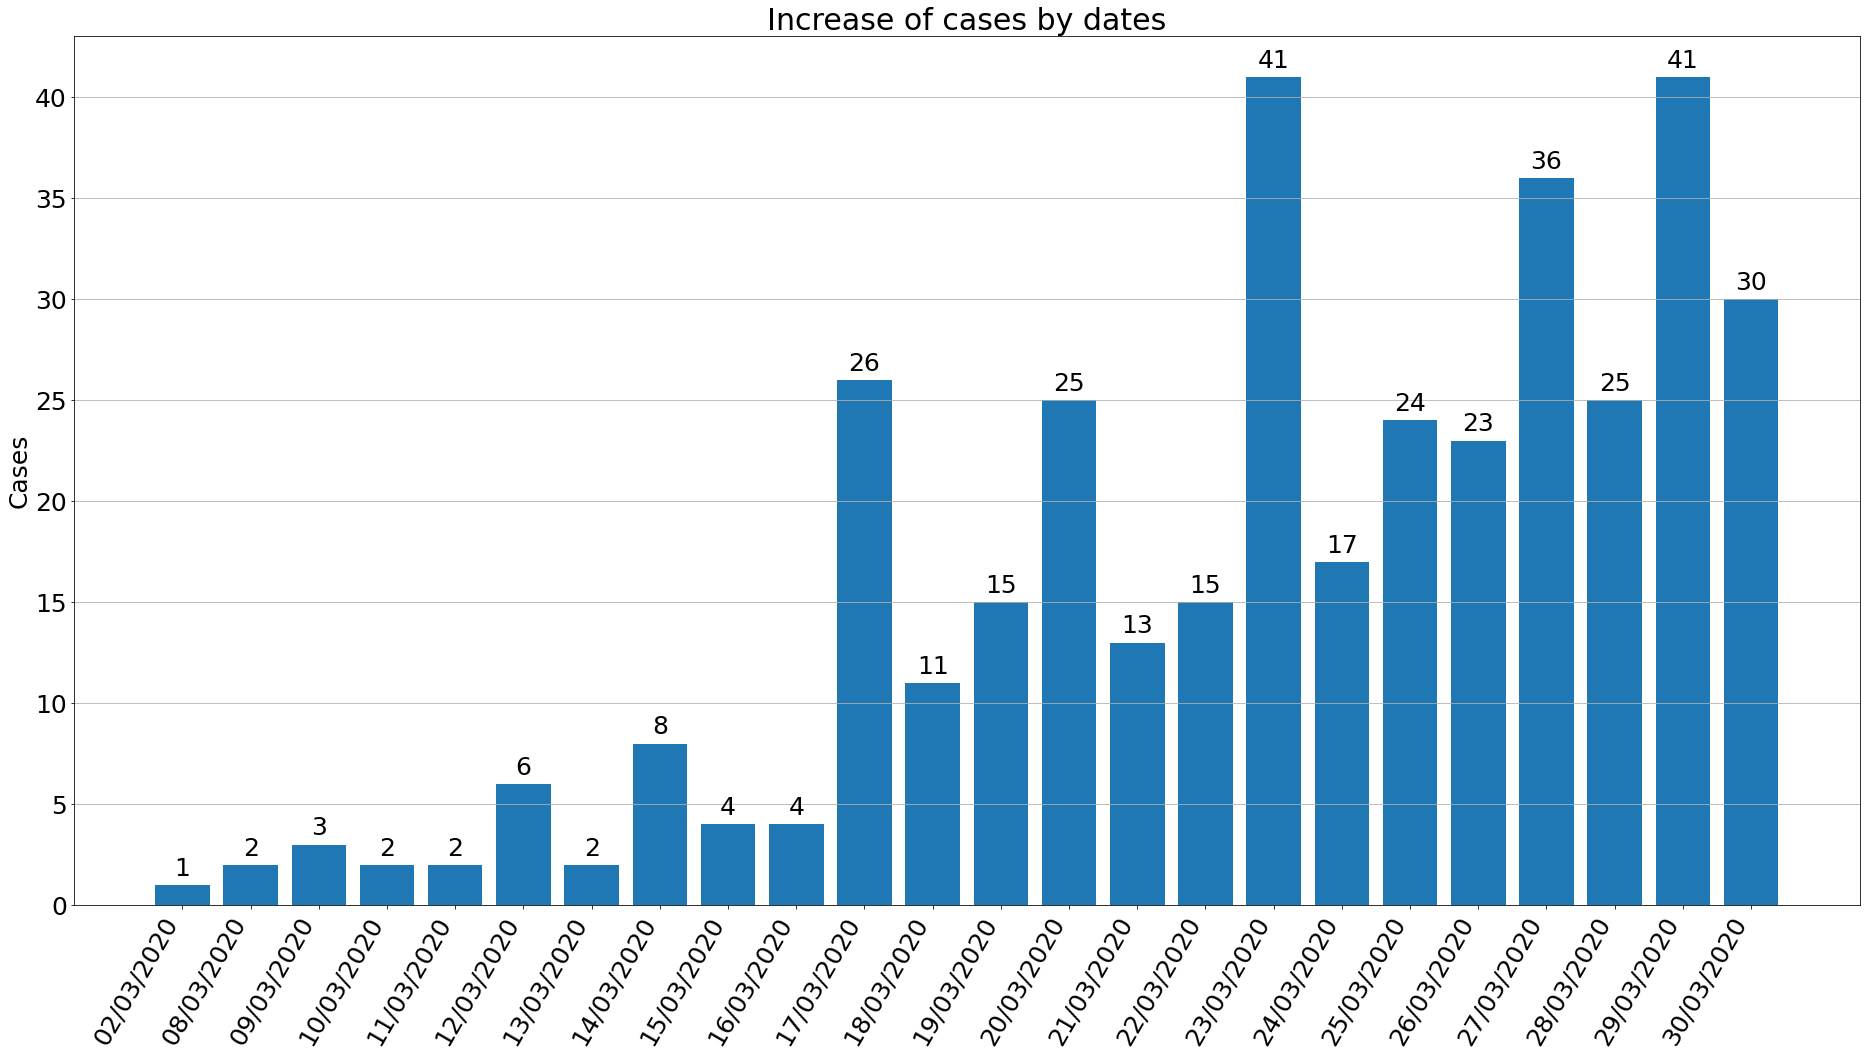

In [53]:
plt.figure(2)
plt.rcParams.update({'font.size': 25})

plt.figure(figsize=(32,16))

plt.bar(barSeries.index, barSeries['Cases'])

for x,y in zip(barSeries.index,barSeries['Cases']):

    label = y

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

plt.title('Increase of cases by dates')
plt.ylabel('Cases')
plt.xticks(rotation=60, ha="right")
plt.gca().yaxis.grid(True)
bar = plt.gcf()
plt.show()

### Export plots as png

In [42]:
bar.savefig('increase_of_cases_by_dates.png')
graph.savefig('total_cases_by_dates.png')